In [1]:
import numpy as np
import zipfile as zp
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

# get HPI data from 50 simulations
#  Sale HPI


sale_hpi_output = pd.DataFrame()
rental_hpi_output = pd.DataFrame()

for i in range(1, 51):
    filepath = './2023-08-11T17-27-22.998079Z/Output-run' + str(i) + '.csv'
    output = pd.read_csv(filepath,sep=';',skipinitialspace=True)
    sale_hpi_output[i] = output['Sale HPI']
    rental_hpi_output[i] = output['Rental HPI']

sale_hpi_output

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,0.9943,0.9940,0.9960,0.9951,0.9930,0.9973,0.9972,0.9973,0.9938,0.9968,...,0.9986,0.9911,0.9976,0.9949,0.9970,0.9965,0.9891,0.9956,0.9948,0.9929
1,0.9502,0.9661,0.9653,0.9642,0.9840,0.9546,0.9949,0.9485,0.9835,0.9915,...,0.9897,0.9835,0.9726,0.9608,0.9570,0.9777,0.9918,0.9751,0.9549,0.9745
2,0.9793,0.9844,0.9786,0.9754,0.9742,0.9862,0.9857,0.9635,0.9822,0.9928,...,0.9799,0.9487,0.9745,0.9766,0.9550,0.9644,0.9815,0.9814,0.9609,0.9522
3,0.9646,0.9728,0.9389,0.9844,0.9653,0.9811,0.9841,0.9695,0.9767,0.9916,...,0.9355,0.9814,0.9613,0.9700,0.9674,0.9751,0.9970,0.9851,0.9426,0.9634
4,0.9720,0.9389,0.9444,0.9865,0.9566,0.9546,0.9653,0.9659,0.9532,0.9955,...,0.9241,0.9526,0.9875,0.9563,0.9630,0.9916,0.9496,0.9433,0.9552,0.9044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,0.6753,0.8478,0.7384,0.6475,1.3278,0.6771,0.8054,0.7139,1.0239,0.8095,...,0.7851,0.8191,0.7366,0.7754,0.6538,0.9264,0.7306,0.6402,0.8978,0.7619
1997,0.6742,0.8494,0.6702,0.6720,1.3493,0.6554,0.8553,0.7022,1.0732,0.8091,...,0.8082,0.7977,0.7210,0.7612,0.6477,0.9313,0.7498,0.6458,0.8918,0.7577
1998,0.6933,0.8304,0.6843,0.6773,1.3403,0.6863,0.8469,0.7346,1.0597,0.8174,...,0.8214,0.8094,0.7408,0.7350,0.6626,0.9424,0.7732,0.6288,0.9160,0.7616
1999,0.6913,0.8211,0.6999,0.6740,1.3492,0.6859,0.8043,0.6848,1.0519,0.8257,...,0.8086,0.8066,0.7124,0.7543,0.6790,0.9644,0.7778,0.6396,0.9620,0.7758


In [2]:
rental_hpi_output

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
0,1.0209,1.0164,1.0229,1.0209,1.0181,1.0182,1.0167,1.0194,1.0229,1.0224,...,1.0220,1.0188,1.0186,1.0195,1.0186,1.0182,1.0173,1.0191,1.0198,1.0200
1,0.9890,1.0546,0.9463,1.0322,0.8533,1.0046,1.0038,0.9808,0.9096,1.0507,...,0.9735,0.9856,0.9415,1.0094,0.9587,0.9034,0.9777,0.9997,0.9750,0.9342
2,1.0126,0.9789,1.0014,1.0666,0.8870,0.9974,0.9954,0.9875,0.9484,0.9403,...,1.0079,0.9525,0.9901,0.9197,0.9741,0.9392,0.9589,0.9931,0.9903,0.9967
3,0.9691,0.9801,1.0045,0.9214,0.9463,0.9069,0.9656,0.9654,0.9425,0.9928,...,0.8953,0.8436,0.9726,0.9600,0.9392,0.9324,0.9992,0.9819,0.9533,0.9665
4,0.9396,1.0229,0.9842,0.9131,0.9317,0.9391,0.9562,0.9247,0.9927,0.9681,...,0.9717,0.8013,0.9431,0.9718,0.9273,0.9443,0.9544,0.9618,0.9273,0.9486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,0.9614,1.0044,0.9323,1.0170,0.9329,0.9718,0.9654,0.9519,1.0063,1.0537,...,0.9307,0.9813,1.0124,0.9622,0.9976,1.0549,0.9729,0.9172,1.0704,1.0288
1997,0.9703,1.0113,0.9498,1.0260,0.9341,0.9654,0.9486,0.9447,0.9956,1.0508,...,0.9456,0.9686,1.0232,0.9693,1.0036,1.0504,0.9773,0.9255,1.0498,1.0010
1998,0.9604,1.0148,0.9459,1.0219,0.9492,0.9699,0.9501,0.9181,0.9927,1.0653,...,0.9346,0.9881,1.0021,0.9728,1.0191,1.0515,0.9688,0.9112,1.0540,1.0228
1999,0.9667,1.0199,0.9658,1.0137,0.9645,0.9461,0.9620,0.9529,0.9937,1.0587,...,0.9607,0.9692,1.0310,0.9568,0.9890,1.0564,0.9633,0.9071,1.0389,1.0464


In [3]:
# filter 1401-2000 data to compare

sale_hpi_filtered = sale_hpi_output[1401:]
rental_hpi_filtered = rental_hpi_output[1401:]
sale_hpi_filtered

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
1401,0.6446,0.7943,0.7459,0.6637,0.7569,0.7039,0.7211,1.4207,0.7909,0.8472,...,1.3477,0.7807,0.6773,0.8653,0.7628,0.8171,0.7061,0.7330,0.7146,0.6713
1402,0.6469,0.8230,0.7926,0.6844,0.7543,0.6878,0.7047,1.3982,0.7955,0.8731,...,1.3483,0.8045,0.6507,0.8619,0.7571,0.8056,0.6952,0.6964,0.6873,0.6810
1403,0.6548,0.7920,0.8602,0.6812,0.7673,0.7052,0.6854,1.3089,0.8151,0.9309,...,1.3777,0.7779,0.6727,0.8046,0.7303,0.8052,0.6729,0.6718,0.6845,0.6843
1404,0.6435,0.7606,0.9074,0.6624,0.7526,0.7275,0.7193,1.3437,0.8066,0.8483,...,1.3577,0.8105,0.6629,0.8452,0.7514,0.7996,0.6686,0.6941,0.6740,0.6923
1405,0.6265,0.7851,0.9429,0.6171,0.7946,0.7247,0.7289,1.4425,0.8340,0.8439,...,1.3819,0.7993,0.6549,0.7941,0.7538,0.8084,0.6907,0.6781,0.6622,0.6969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,0.6753,0.8478,0.7384,0.6475,1.3278,0.6771,0.8054,0.7139,1.0239,0.8095,...,0.7851,0.8191,0.7366,0.7754,0.6538,0.9264,0.7306,0.6402,0.8978,0.7619
1997,0.6742,0.8494,0.6702,0.6720,1.3493,0.6554,0.8553,0.7022,1.0732,0.8091,...,0.8082,0.7977,0.7210,0.7612,0.6477,0.9313,0.7498,0.6458,0.8918,0.7577
1998,0.6933,0.8304,0.6843,0.6773,1.3403,0.6863,0.8469,0.7346,1.0597,0.8174,...,0.8214,0.8094,0.7408,0.7350,0.6626,0.9424,0.7732,0.6288,0.9160,0.7616
1999,0.6913,0.8211,0.6999,0.6740,1.3492,0.6859,0.8043,0.6848,1.0519,0.8257,...,0.8086,0.8066,0.7124,0.7543,0.6790,0.9644,0.7778,0.6396,0.9620,0.7758


In [4]:
sale_hpi_filtered['mean'] = sale_hpi_filtered.apply(lambda x: x.sum()/50, axis=1)
rental_hpi_filtered['mean'] = rental_hpi_filtered.apply(lambda x: x.sum()/50, axis=1)
sale_hpi_filtered

/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_47212/249112761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_hpi_filtered['mean'] = sale_hpi_filtered.apply(lambda x: x.sum()/50, axis=1)
/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_47212/249112761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rental_hpi_filtered['mean'] = rental_hpi_filtered.apply(lambda x: x.sum()/50, axis=1)


,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,mean
1401,0.6446,0.7943,0.7459,0.6637,0.7569,0.7039,0.7211,1.4207,0.7909,0.8472,...,0.7807,0.6773,0.8653,0.7628,0.8171,0.7061,0.7330,0.7146,0.6713,0.837314
1402,0.6469,0.8230,0.7926,0.6844,0.7543,0.6878,0.7047,1.3982,0.7955,0.8731,...,0.8045,0.6507,0.8619,0.7571,0.8056,0.6952,0.6964,0.6873,0.6810,0.832014
1403,0.6548,0.7920,0.8602,0.6812,0.7673,0.7052,0.6854,1.3089,0.8151,0.9309,...,0.7779,0.6727,0.8046,0.7303,0.8052,0.6729,0.6718,0.6845,0.6843,0.835560
1404,0.6435,0.7606,0.9074,0.6624,0.7526,0.7275,0.7193,1.3437,0.8066,0.8483,...,0.8105,0.6629,0.8452,0.7514,0.7996,0.6686,0.6941,0.6740,0.6923,0.840610
1405,0.6265,0.7851,0.9429,0.6171,0.7946,0.7247,0.7289,1.4425,0.8340,0.8439,...,0.7993,0.6549,0.7941,0.7538,0.8084,0.6907,0.6781,0.6622,0.6969,0.838936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,0.6753,0.8478,0.7384,0.6475,1.3278,0.6771,0.8054,0.7139,1.0239,0.8095,...,0.8191,0.7366,0.7754,0.6538,0.9264,0.7306,0.6402,0.8978,0.7619,0.850928
1997,0.6742,0.8494,0.6702,0.6720,1.3493,0.6554,0.8553,0.7022,1.0732,0.8091,...,0.7977,0.7210,0.7612,0.6477,0.9313,0.7498,0.6458,0.8918,0.7577,0.848102
1998,0.6933,0.8304,0.6843,0.6773,1.3403,0.6863,0.8469,0.7346,1.0597,0.8174,...,0.8094,0.7408,0.7350,0.6626,0.9424,0.7732,0.6288,0.9160,0.7616,0.847710
1999,0.6913,0.8211,0.6999,0.6740,1.3492,0.6859,0.8043,0.6848,1.0519,0.8257,...,0.8066,0.7124,0.7543,0.6790,0.9644,0.7778,0.6396,0.9620,0.7758,0.844708


In [5]:
# OECD database
OECD_data = pd.read_csv('./HPI-output.csv',sep=',',skipinitialspace=True)
OECD_data

,Value
0,2.607
1,2.607
2,2.607
3,2.853
4,2.853
...,...
595,131.603
596,135.936
597,133.070
598,135.110


<AxesSubplot:>

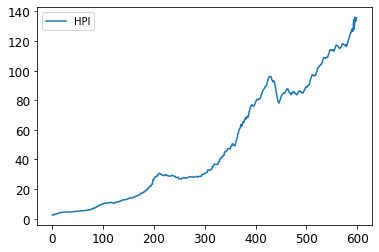

In [6]:
fig, ax = plt.subplots()
OECD_data[['Value']][:].plot(ax=ax,fontsize=12, y=['Value'],label=['HPI'])

In [7]:
from statsmodels.tsa.filters.hp_filter import hpfilter
hpi_cycle,hpi_trend = hpfilter(OECD_data['Value'], lamb=129600)
hpi_segr = pd.DataFrame()
hpi_segr['HPI'] = OECD_data[['Value']]
hpi_segr['cycle']= hpi_cycle
hpi_segr['trend'] = hpi_trend

hpi_segr

,HPI,cycle,trend
0,2.607,-0.395732,3.002732
1,2.607,-0.441658,3.048658
2,2.607,-0.487581,3.094581
3,2.853,-0.287495,3.140495
4,2.853,-0.333388,3.186388
...,...,...,...
595,131.603,2.648305,128.954695
596,135.936,6.548277,129.387723
597,133.070,3.249038,129.820962
598,135.110,4.855688,130.254312


<AxesSubplot:>

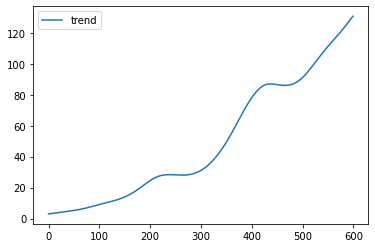

In [8]:
hpi_segr[['trend']][:].plot()

<AxesSubplot:>

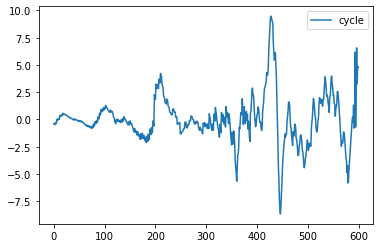

In [9]:
hpi_segr[['cycle']][:].plot()

<AxesSubplot:>

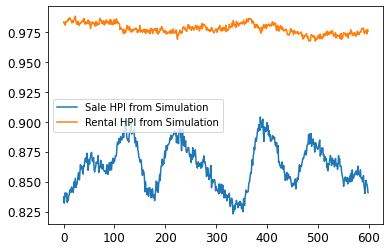

In [10]:
fig, ax = plt.subplots()
# hpi_segr[['cycle']][:].plot(ax=ax,fontsize=12, y=['cycle'],label=['OECD data from 1971 to 2022'])
sale_hpi_filtered[['mean']][:].reset_index().plot(ax=ax,fontsize=12, y=['mean'],label=['Sale HPI from Simulation'])
rental_hpi_filtered[['mean']][:].reset_index().plot(ax=ax,fontsize=12, y=['mean'],label=['Rental HPI from Simulation'])

In [11]:
sale_cycle,sale_trend = hpfilter(sale_hpi_filtered['mean'], lamb=129600)
sale_segr = pd.DataFrame()
sale_segr['HPI'] = sale_hpi_filtered[['mean']]
sale_segr['cycle']= sale_cycle
sale_segr['trend'] = sale_trend

sale_segr

,HPI,cycle,trend
1401,0.837314,0.000979,0.836335
1402,0.832014,-0.004918,0.836932
1403,0.835560,-0.001968,0.837528
1404,0.840610,0.002485,0.838125
1405,0.838936,0.000215,0.838721
...,...,...,...
1996,0.850928,0.002691,0.848237
1997,0.848102,0.000122,0.847980
1998,0.847710,-0.000014,0.847724
1999,0.844708,-0.002759,0.847467


<AxesSubplot:>

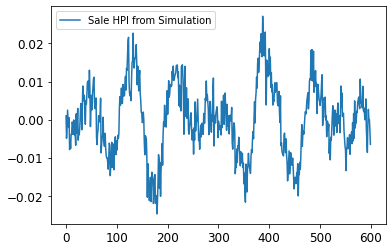

In [12]:
fig, ax = plt.subplots()
# hpi_segr[['cycle']][:].plot(ax=ax,fontsize=12, y=['cycle'],label=['OECD data from 1971 to 2022'])
sale_segr[['cycle']][:].reset_index().plot(ax=ax,fontsize=12, y=['cycle'],label=['Sale HPI from Simulation'])

<AxesSubplot:>

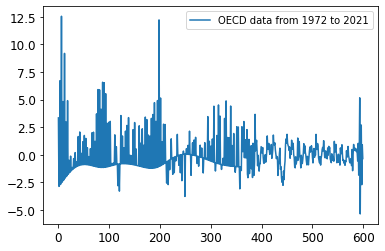

In [13]:
pc_data = pd.read_csv('./72-21-pc.csv',sep=',',skipinitialspace=True)

pc_cycle,pc_trend = hpfilter(pc_data['pc'], lamb=129600)
pc_segr = pd.DataFrame()
pc_segr['HPI'] = pc_data[['pc']]
pc_segr['cycle']= pc_cycle
pc_segr['trend'] = pc_trend

fig, ax = plt.subplots()
pc_segr[['cycle']][:].plot(ax=ax,fontsize=12, y=['cycle'],label=['OECD data from 1972 to 2021'])

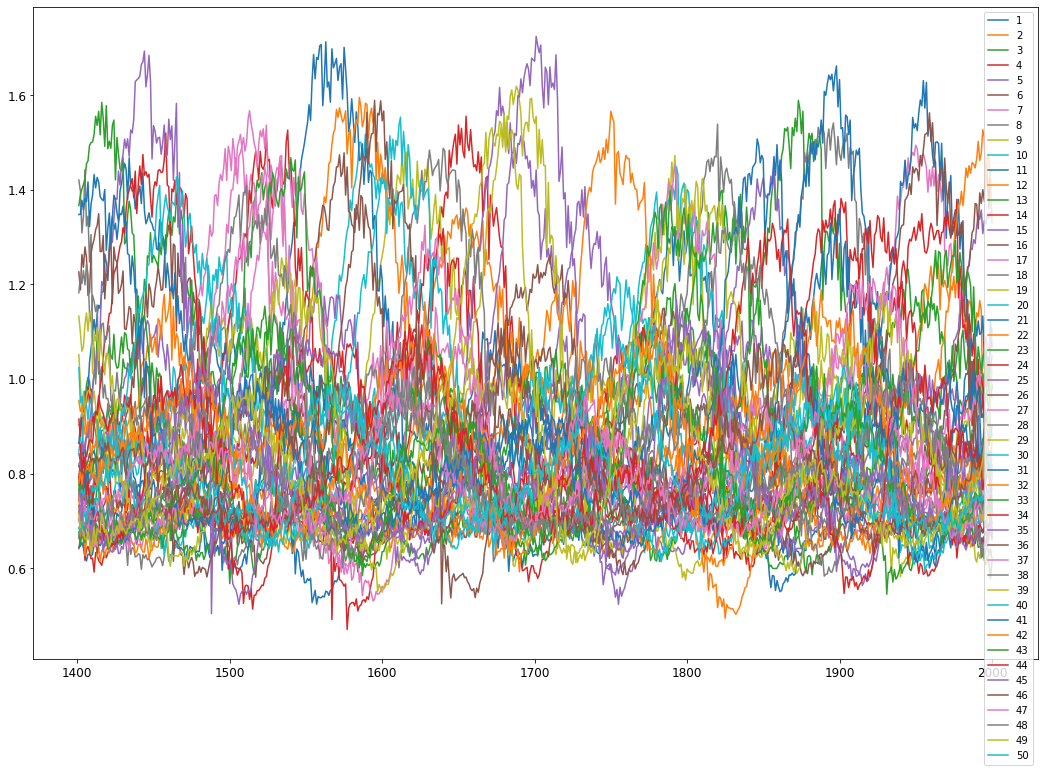

In [14]:
fig, ax = plt.subplots(figsize=(18,12))

for i in range(1,51):
    sale_hpi_filtered.plot(ax=ax,fontsize=12, y=[i])
    

<AxesSubplot:>

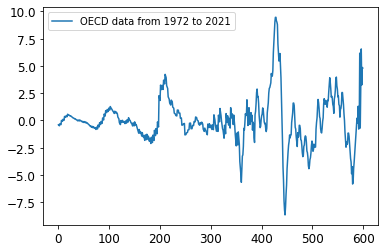

In [15]:
ipb_data = pd.read_csv('./72-21-ipb.csv',sep=',',skipinitialspace=True)

ipb_cycle,ipb_trend = hpfilter(ipb_data['ipb'], lamb=129600)
ipb_segr = pd.DataFrame()
ipb_segr['HPI'] = ipb_data[['ipb']]
ipb_segr['cycle']= ipb_cycle
ipb_segr['trend'] = ipb_trend

fig, ax = plt.subplots()
ipb_segr[['cycle']][:].plot(ax=ax,fontsize=12, y=['cycle'],label=['OECD data from 1972 to 2021'])

<AxesSubplot:>

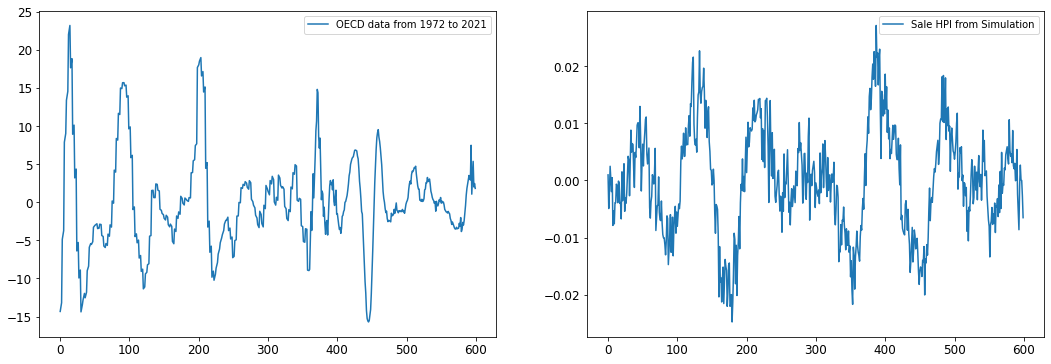

In [16]:
py_data = pd.read_csv('./72-21-py.csv',sep=',',skipinitialspace=True)

py_cycle,py_trend = hpfilter(py_data['py'], lamb=129600)
py_segr = pd.DataFrame()
py_segr['HPI'] = py_data[['py']]
py_segr['cycle']= py_cycle
py_segr['trend'] = py_trend

fig, axes = plt.subplots(figsize=(18,6), nrows=1, ncols=2)
py_segr[['cycle']][:].plot(ax=axes[0],fontsize=12, y=['cycle'],label=['OECD data from 1972 to 2021'])
sale_segr[['cycle']][:].reset_index().plot(ax=axes[1],fontsize=12, y=['cycle'],label=['Sale HPI from Simulation'])

<AxesSubplot:>

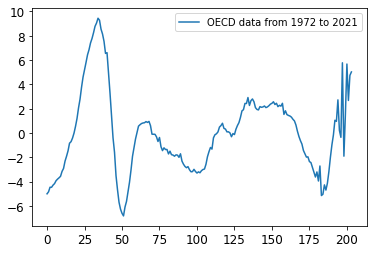

In [17]:
ipb_data = pd.read_csv('./72-21-ipdsa.csv',sep=',',skipinitialspace=True)

ipb_cycle,ipb_trend = hpfilter(ipb_data['ipd_sa'], lamb=129600)
ipb_segr = pd.DataFrame()
ipb_segr['HPI'] = ipb_data[['ipd_sa']]
ipb_segr['cycle']= ipb_cycle
ipb_segr['trend'] = ipb_trend

fig, ax = plt.subplots()
ipb_segr[['cycle']][:].plot(ax=ax,fontsize=12, y=['cycle'],label=['OECD data from 1972 to 2021'])

<AxesSubplot:>

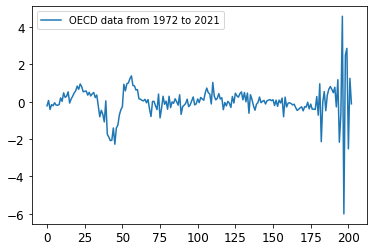

In [18]:
pc_data = pd.read_csv('./72-21-pcsa.csv',sep=',',skipinitialspace=True)

pc_cycle,pc_trend = hpfilter(pc_data['pcsa'], lamb=129600)
pc_segr = pd.DataFrame()
pc_segr['HPI'] = pc_data[['pcsa']]
pc_segr['cycle']= pc_cycle
pc_segr['trend'] = pc_trend

fig, ax = plt.subplots()
pc_segr[['cycle']][:].plot(ax=ax,fontsize=12, y=['cycle'],label=['OECD data from 1972 to 2021'])

<AxesSubplot:>

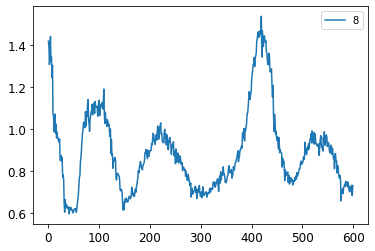

In [19]:
fig, ax = plt.subplots()
sale_hpi_filtered.reset_index().plot(ax=ax,fontsize=12, y=[8])

/var/folders/wj/360bbnt54ns2j1m7zq0gkn3c0000gn/T/ipykernel_47212/2729505949.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hpa_filtered['mean'] = hpa_filtered.apply(lambda x: x.sum()/50, axis=1)


<AxesSubplot:>

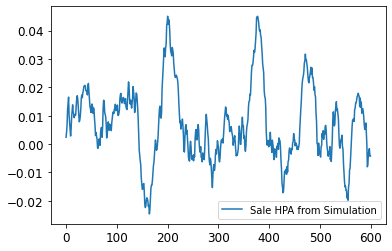

In [20]:
# Sale AnnualHPA
hpa = pd.DataFrame()
for i in range(1, 51):
    filepath = './2023-08-11T17-27-22.998079Z/Output-run' + str(i) + '.csv'
    output = pd.read_csv(filepath,sep=';',skipinitialspace=True)
    hpa[i] = output['Sale AnnualHPA']

hpa_filtered = hpa[1401:]

hpa_filtered['mean'] = hpa_filtered.apply(lambda x: x.sum()/50, axis=1)


fig, ax = plt.subplots()
hpa_filtered[['mean']][:].reset_index().plot(ax=ax,fontsize=12, y=['mean'],label=['Sale HPA from Simulation'])
# for i in range(1,51):
    # sale_hpi_filtered.plot(ax=ax,fontsize=12, y=[i])

<AxesSubplot:>

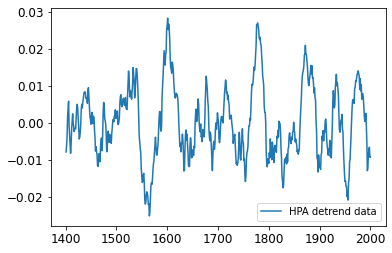

In [21]:
hpa_cycle,hpa_trend = hpfilter(hpa_filtered['mean'], lamb=129600)
hpa_segr = pd.DataFrame()
hpa_segr['HPI'] = hpa_filtered[['mean']]
hpa_segr['cycle']= hpa_cycle
hpa_segr['trend'] = hpa_trend

fig, ax = plt.subplots()
hpa_segr[['cycle']][:].plot(ax=ax,fontsize=12, y=['cycle'],label=['HPA detrend data'])